# Extract TF-IDF features by scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [10]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

TfidfVectorizer()


In [2]:
corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?',
]

In [12]:
X = vectorizer.fit_transform(corpus)

In [14]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'], dtype=object)

In [15]:
np.set_printoptions(linewidth=200) 
print(X)
print(X.todense())

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
[[0.         0.46979139 0.58028582 0.38408524 0.         0.         0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762 0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.         0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.         0.38408524 0.         0.38408524]]


In [16]:
test_doc_1 = ["This document is the second one"]
Y = vectorizer.transform(test_doc_1)
print(Y)

  (0, 8)	0.2906139364798904
  (0, 6)	0.2906139364798904
  (0, 5)	0.5569007930298784
  (0, 4)	0.5569007930298784
  (0, 3)	0.2906139364798904
  (0, 1)	0.3554625623274153


In [7]:
test_doc_2 = ["The third document is mine"]
Z = vectorizer.transform(test_doc_2)
print(Z)

  (0, 7)	0.715739223614785
  (0, 6)	0.37350241887084823
  (0, 3)	0.37350241887084823
  (0, 1)	0.4568470750421368


# Construct a learning model with TF-IDF features

In [8]:
!pip install datasets 

     |████████████████████████████████| 451 kB 963 kB/s eta 0:00:01
     |████████████████████████████████| 110 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 212 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 35.9 MB 1.9 MB/s eta 0:00:01     |████████████████████████████▌   | 32.0 MB 1.3 MB/s eta 0:00:04
     |████████████████████████████████| 182 kB 1.1 MB/s eta 0:00:01


In [ ]:
from datasets import list_datasets, load_dataset
from pprint import pprint
trainSet = load_dataset('yelp_review_full',split='train')
testSet = load_dataset('yelp_review_full',split='test')

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features = 300)

tf_train_features = vectorizer.fit_transform(trainSet['text'])
tf_test_features = vectorizer.fit_transform(testSet['text'])

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(tf_train_features, trainSet['label'])

In [47]:
y_pred = reg.predict(tf_test_features)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testSet['label'], y_pred)

1.2234067139355373

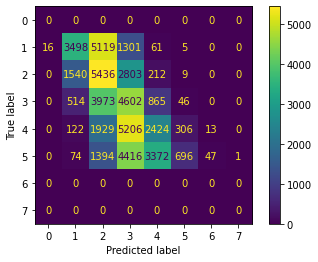

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testSet['label'], y_pred.astype(int))
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()